In [ ]:
Problem statement: https://ovgu-ailab.github.io/idl2020w/ass10.html

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
! cd /content/drive/MyDrive/
! cd drive/
! pwd
! ls
#! unzip cifar_attempts.zip


/content
cifar_attempts.zip  drive  sample_data


In [21]:
! unzip cifar_attempts.zip 

Archive:  cifar_attempts.zip
  inflating: data1.npz               
  inflating: data2.npz               
  inflating: data3.npz               
  inflating: data4.npz               


In [48]:
def get_data(dataset):
  data = np.load(dataset)
  print(data.files)
  return data['train_imgs'] , data['train_lbls'] , data['val_imgs'], data['val_lbls'], data['test_imgs'], data['test_lbls']


Dataset 1:
Class imbalance: Data missing for some of the class labels in Test and Validation data.

In [124]:
train_imgs_1 , train_lbls_1 , val_imgs_1, val_lbls_1, test_imgs_1, test_lbls_1 = get_data('data1.npz')
print("train_lbls = ",train_lbls_1.shape)
train_imgs_1.shape

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
train_lbls =  (36004,)


(36004, 32, 32, 3)

In [163]:
print(train_imgs_1.reshape(-1).shape)
train_imgs_1.shape
print(train_imgs_1[0][train_imgs_1[0] > 0] )
print(train_imgs_1[0][train_imgs_1[0] > 1] )

(110604288,)
[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
[]


In [126]:
def Analysedata(train_imgs,train_lbls,val_imgs,val_lbls,test_imgs,test_lbls):
  print("train_lbls:",train_lbls)
  plt.hist(train_lbls-0.5,bins=np.arange(0,11)-0.5,rwidth=0.9)
  plt.title("Training Set Label distribution")
  plt.show()

  plt.hist(val_lbls-0.5,bins=np.arange(0,11)-0.5,rwidth=0.9)
  plt.title("Validation Set Label distribution")
  plt.show()

  plt.hist(test_lbls-0.5,bins=np.arange(0,11)-0.5,rwidth=0.9)
  plt.title("Test Set Label distribution")
  plt.show()

  plt.hist(train_imgs.reshape(-1), bins=np.linspace(0,1,256), rwidth=0.9)
  plt.title("Train Images")
  plt.show()

  plt.hist(val_imgs.reshape(-1), bins=np.linspace(0,1,256), rwidth=0.9)
  plt.title("Validation Images")
  plt.show()

  plt.hist(test_imgs.reshape(-1), bins=np.linspace(0,1,256), rwidth=0.9)
  plt.title("Test Images")
  plt.show()



train_lbls: [6 9 9 ... 1 5 6]


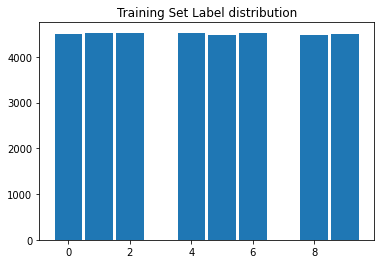

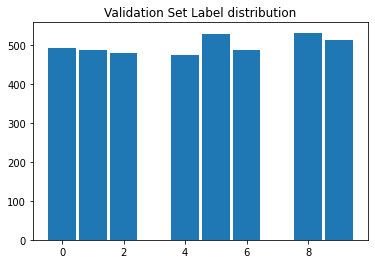

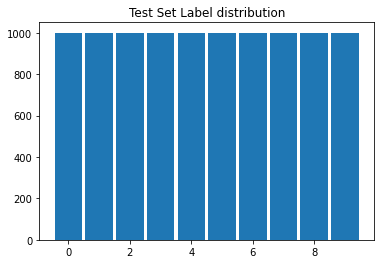

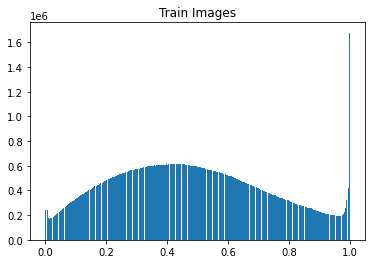

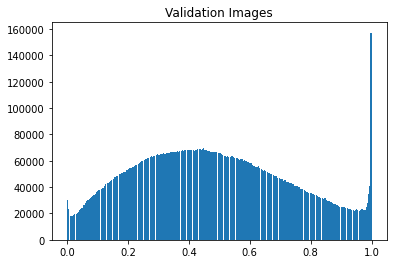

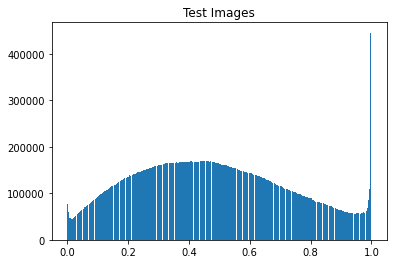

In [127]:
Analysedata(train_imgs_1,train_lbls_1,val_imgs_1,val_lbls_1,test_imgs_1,test_lbls_1)

In [128]:
print("Train images mean: {} and Std: {}".format(train_imgs_1.mean(),train_imgs_1.std()))
print("Test images mean: {} and Std: {}".format(test_imgs_1.mean(),test_imgs_1.std()))
print("Validation images mean: {} and Std: {}".format(val_imgs_1.mean(),val_imgs_1.std()))


Train images mean: 0.47645729780197144 and Std: 0.2511625587940216
Test images mean: 0.4765850305557251 and Std: 0.2512194812297821
Validation images mean: 0.4763590097427368 and Std: 0.2495805025100708


In [133]:
cls_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def display_images(images,labels):
  plt.figure(figsize=(10,10))  
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(cls_names[labels[i]])

  plt.show()

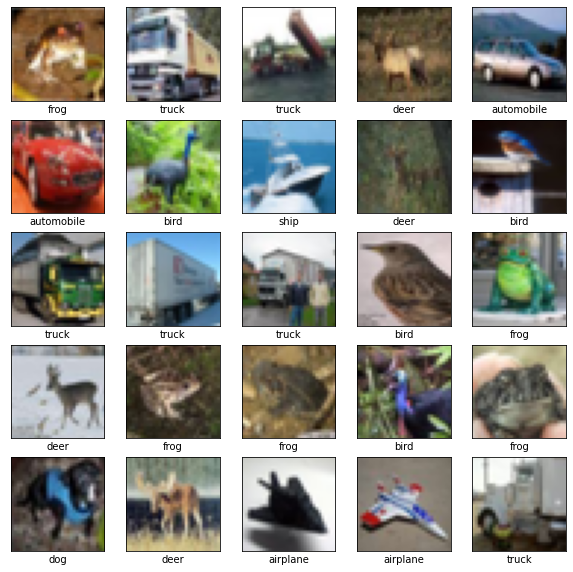

In [134]:
display_images(train_imgs_1,train_lbls_1)

In [144]:
def Genreate_CNN_Arch(conv_layers,dense_layers,num_classes,lastlayeractivation='softmax'):
  model = Sequential()

  for idx in range(len(conv_layers)):
    layer = conv_layers[idx]
    if idx == 0:
      #print("Adding layer",idx)
      model.add(Conv2D(layer[0],(layer[1],layer[1]),strides=(layer[2],layer[2]),padding=layer[3],activation=layer[4],input_shape=(32,32,3)))
      model.add(MaxPooling2D(pool_size=(layer[5],layer[5]),strides=(layer[6],layer[6]),padding=layer[7]))
    else:
      #print("Adding Next layer",idx)
      model.add(Conv2D(layer[0],(layer[1],layer[1]),strides=(layer[2],layer[2]),padding=layer[3],activation=layer[4]))
      model.add(MaxPooling2D(pool_size=(layer[5],layer[5]),strides=(layer[6],layer[6]),padding=layer[7]))

  model.add(Flatten())

  # Add Denselayer
  for idx in range(len(dense_layers)):
    layer = dense_layers[idx]
    model.add(Dense(units=layer[0],activation=layer[1]))

  #output layer.
  model.add(Dense(num_classes,activation=lastlayeractivation ))

  return model

In [145]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam(0.01)
num_classes = 10
# number_of_filters, filter_size, convstride, convpadding, activation, max_pool_size, maxpoolstrides, maxpoolpadding.
conv_layers = [[64,3,1,"valid",'relu',1,2,"valid"],[64,3,1,"valid",'relu',2,1,"valid"]]
#number_of_units, activation function.
dense_layers = [[128,'relu'],[64,'relu']]
model_d1 = Genreate_CNN_Arch(conv_layers,dense_layers,num_classes)
model_d1.summary()

model_d1.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])
model_d1.fit(x=train_imgs_1,y=train_lbls_1,batch_size=128,epochs=20,validation_data=(val_imgs_1,val_lbls_1),shuffle=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_31 (Dense)             (None, 64)               

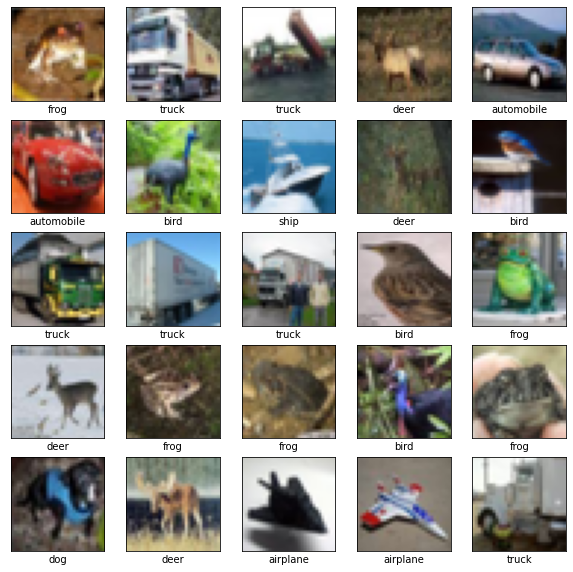

In [147]:
display_images(train_imgs_1,train_lbls_1)

In [146]:
test_loss, test_accuracy = model_d1.evaluate(test_imgs_1,test_lbls_1,batch_size=128)
print("test_loss: {} test_acc: {}".format(test_loss,test_accuracy))

79/79 [==============================] - 5s 68ms/step - loss: 7.0456 - accuracy: 0.4633
test_loss: 7.04557991027832 test_acc: 0.4632999897003174


Dataset 2:


In [148]:
train_imgs_2 , train_lbls_2 , val_imgs_2, val_lbls_2, test_imgs_2, test_lbls_2 = get_data('data2.npz')
print("train_lbls = ",train_lbls_2.shape)
train_imgs_2.shape

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
train_lbls =  (50000,)


(50000, 32, 32, 3)

train_lbls: [6 9 9 ... 9 1 1]


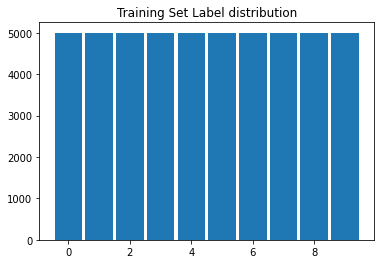

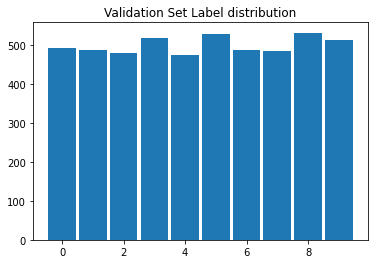

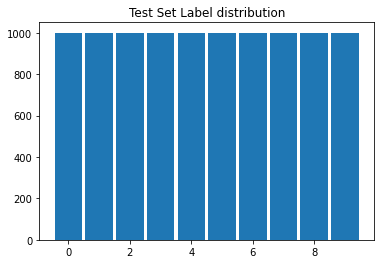

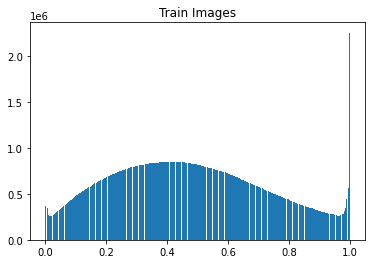

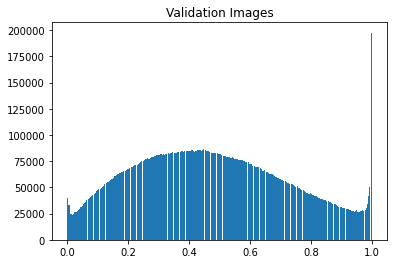

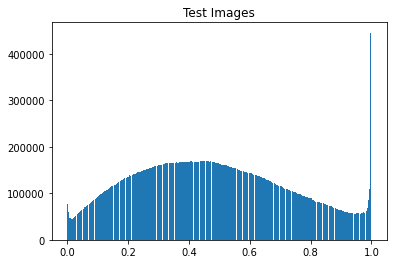

In [149]:
Analysedata(train_imgs_2,train_lbls_2,val_imgs_2,val_lbls_2,test_imgs_2,test_lbls_2)

In [150]:
print("Train images mean: {} and Std: {}".format(train_imgs_2.mean(),train_imgs_2.std()))
print("Test images mean: {} and Std: {}".format(test_imgs_2.mean(),test_imgs_2.std()))
print("Validation images mean: {} and Std: {}".format(val_imgs_2.mean(),val_imgs_2.std()))

Train images mean: 0.4733622968196869 and Std: 0.25156891345977783
Test images mean: 0.4765850305557251 and Std: 0.2512194812297821
Validation images mean: 0.4733269214630127 and Std: 0.2501388490200043


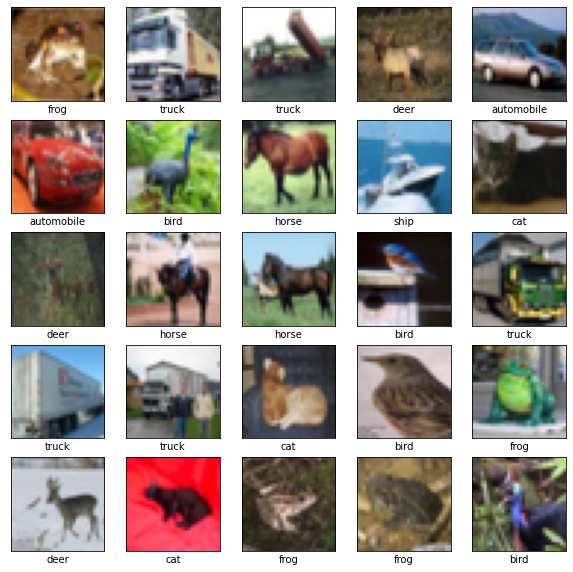

In [161]:
display_images(train_imgs_2,train_lbls_2)

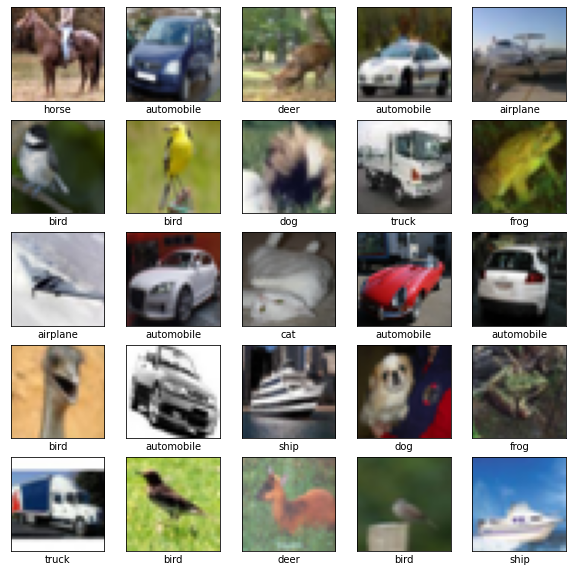

In [162]:
display_images(val_imgs_2,val_lbls_2)

In [153]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam(0.01)
num_classes = 10
# number_of_filters, filter_size, convstride, convpadding, activation, max_pool_size, maxpoolstrides, maxpoolpadding.
conv_layers = [[64,3,1,"valid",'relu',1,2,"valid"],[64,3,1,"valid",'relu',2,1,"valid"]]
#number_of_units, activation function.
dense_layers = [[128,'relu'],[64,'relu']]
model_d2 = Genreate_CNN_Arch(conv_layers,dense_layers,num_classes)
#model_d2.summary()

model_d2.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])
model_d2.fit(x=train_imgs_2,y=train_lbls_2,batch_size=128,epochs=20,validation_data=(val_imgs_2,val_lbls_2),shuffle=True)

Epoch 1/20
391/391 [==============================] - 101s 258ms/step - loss: 2.4054 - accuracy: 0.0995 - val_loss: 2.3031 - val_accuracy: 0.0958
Epoch 2/20
391/391 [==============================] - 100s 256ms/step - loss: 2.3032 - accuracy: 0.1003 - val_loss: 2.3022 - val_accuracy: 0.1064
Epoch 3/20
391/391 [==============================] - 100s 256ms/step - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3034 - val_accuracy: 0.1038
Epoch 4/20
391/391 [==============================] - 102s 261ms/step - loss: 2.3034 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.1058
Epoch 5/20
391/391 [==============================] - 102s 260ms/step - loss: 2.3033 - accuracy: 0.0992 - val_loss: 2.3035 - val_accuracy: 0.0950
Epoch 6/20
391/391 [==============================] - 102s 261ms/step - loss: 2.3033 - accuracy: 0.0994 - val_loss: 2.3030 - val_accuracy: 0.0950
Epoch 7/20
391/391 [==============================] - 104s 265ms/step - loss: 2.3032 - accuracy: 0.0998 - val_loss: 2.3030 -

In [154]:
test_loss, test_accuracy = model_d2.evaluate(test_imgs_2,test_lbls_2,batch_size=128)
print("test_loss: {} test_acc: {}".format(test_loss,test_accuracy))

79/79 [==============================] - 5s 66ms/step - loss: 2.3029 - accuracy: 0.1000
test_loss: 2.3028650283813477 test_acc: 0.10000000149011612


Dataset 3:
Test and Validation data is not from the same distribution.

In [155]:
train_imgs_3 , train_lbls_3 , val_imgs_3, val_lbls_3, test_imgs_3, test_lbls_3 = get_data('data3.npz')
print("test_lbls = ",test_lbls_3.shape)
print("train_lbls = ",train_lbls_3.shape)
print("validation_lbls = ",val_lbls_3.shape)
train_imgs_3.shape

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
test_lbls =  (10000,)
train_lbls =  (45000,)
validation_lbls =  (5000,)


(45000, 32, 32, 3)

train_lbls: [6 9 9 ... 1 5 6]


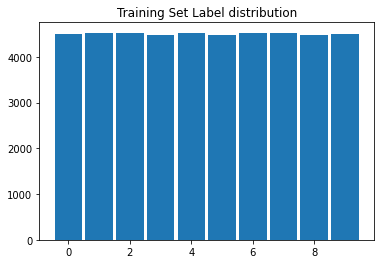

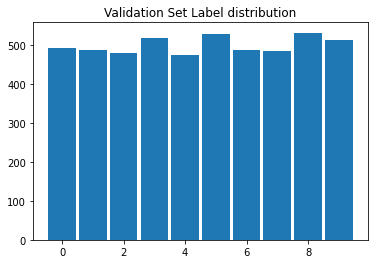

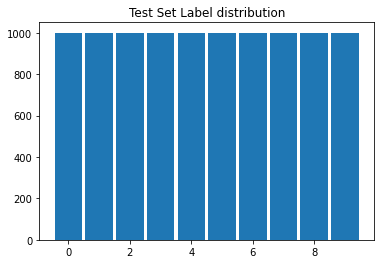

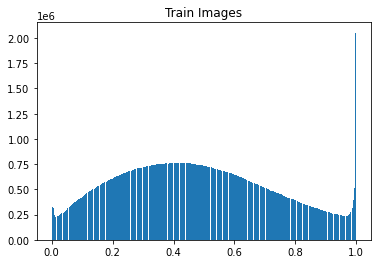

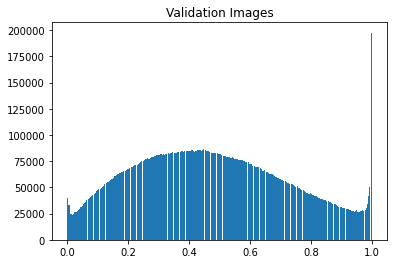

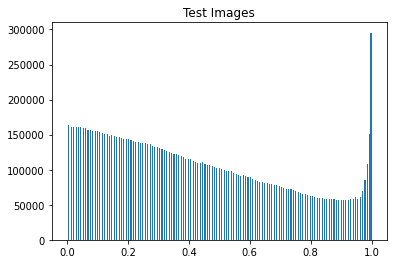

In [156]:
Analysedata(train_imgs_3,train_lbls_3,val_imgs_3,val_lbls_3,test_imgs_3,test_lbls_3)

In [157]:
print("Train images mean: {} and Std: {}".format(train_imgs_3.mean(),train_imgs_3.std()))
print("Test images mean: {} and Std: {}".format(test_imgs_3.mean(),test_imgs_3.std()))
print("Validation images mean: {} and Std: {}".format(val_imgs_3.mean(),val_imgs_3.std()))

Train images mean: 0.47336721420288086 and Std: 0.2517271041870117
Test images mean: -0.04683014005422592 and Std: 0.5024389028549194
Validation images mean: 0.4733269214630127 and Std: 0.2501388490200043


In [158]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam(0.01)
num_classes = 10
# number_of_filters, filter_size, convstride, convpadding, activation, max_pool_size, maxpoolstrides, maxpoolpadding.
conv_layers = [[64,3,1,"valid",'relu',1,2,"valid"],[64,3,1,"valid",'relu',2,1,"valid"]]
#number_of_units, activation function.
dense_layers = [[128,'relu'],[64,'relu']]
model_d3 = Genreate_CNN_Arch(conv_layers,dense_layers,num_classes)
#model_d2.summary()

model_d3.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])
model_d3.fit(x=train_imgs_3,y=train_lbls_3,batch_size=128,epochs=10,validation_data=(val_imgs_3,val_lbls_3),shuffle=True)

Epoch 1/10
352/352 [==============================] - 91s 257ms/step - loss: 2.6038 - accuracy: 0.2017 - val_loss: 1.8901 - val_accuracy: 0.3040
Epoch 2/10
352/352 [==============================] - 90s 257ms/step - loss: 1.8836 - accuracy: 0.3047 - val_loss: 1.8903 - val_accuracy: 0.3060
Epoch 3/10
352/352 [==============================] - 92s 260ms/step - loss: 1.8516 - accuracy: 0.3234 - val_loss: 1.7705 - val_accuracy: 0.3392
Epoch 4/10
352/352 [==============================] - 91s 259ms/step - loss: 1.7661 - accuracy: 0.3519 - val_loss: 1.7335 - val_accuracy: 0.3602
Epoch 5/10
352/352 [==============================] - 93s 263ms/step - loss: 1.7339 - accuracy: 0.3660 - val_loss: 1.7595 - val_accuracy: 0.3492
Epoch 6/10
352/352 [==============================] - 92s 262ms/step - loss: 1.7050 - accuracy: 0.3777 - val_loss: 1.7073 - val_accuracy: 0.3704
Epoch 7/10
352/352 [==============================] - 91s 259ms/step - loss: 1.6975 - accuracy: 0.3770 - val_loss: 1.6918 - val_ac

In [159]:
test_loss, test_accuracy = model_d3.evaluate(test_imgs_3,test_lbls_3,batch_size=128)
print("test_loss: {} test_acc: {}".format(test_loss,test_accuracy))

79/79 [==============================] - 5s 66ms/step - loss: 2.8221 - accuracy: 0.1885
test_loss: 2.822148323059082 test_acc: 0.18850000202655792


Data Set 4: Duplicate images in training data.

In [107]:
train_imgs_4 , train_lbls_4 , val_imgs_4, val_lbls_4, test_imgs_4, test_lbls_4 = get_data('data4.npz')
print("train_lbls = ",train_lbls_4.shape)
print("test_lbls = ",test_lbls_4.shape)
print("validation_lbls = ",val_lbls_4.shape)
train_imgs_4.shape

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']
train_lbls =  (45000,)
test_lbls =  (10000,)
validation_lbls =  (5000,)


(45000, 32, 32, 3)

train_lbls: [8 8 5 ... 7 1 9]


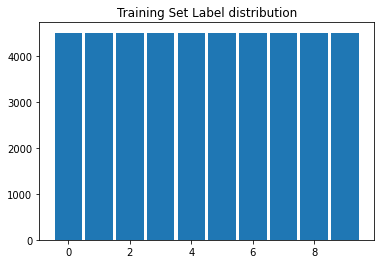

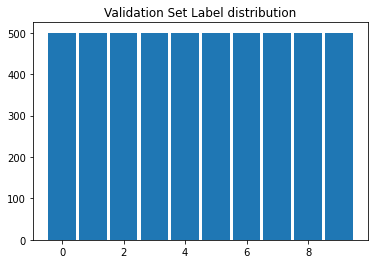

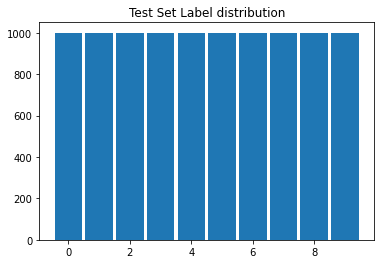

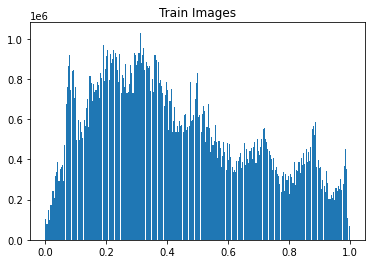

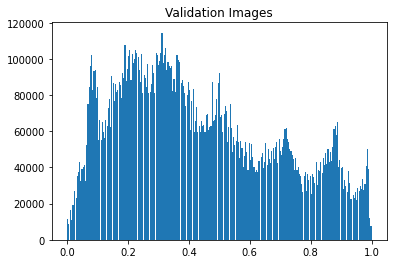

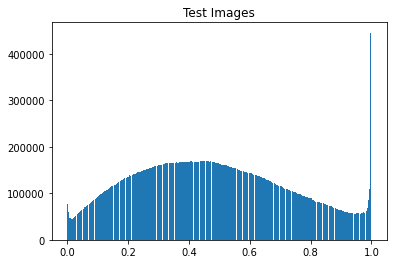

In [108]:
Analysedata(train_imgs_4,train_lbls_4,val_imgs_4,val_lbls_4,test_imgs_4,test_lbls_4)

In [109]:
print("Train images mean: {} and Std: {}".format(train_imgs_4.mean(),train_imgs_4.std()))
print("Test images mean: {} and Std: {}".format(test_imgs_4.mean(),test_imgs_4.std()))
print("Validation images mean: {} and Std: {}".format(val_imgs_4.mean(),val_imgs_4.std()))

Train images mean: 0.4311666488647461 and Std: 0.25628793239593506
Test images mean: 0.4765850305557251 and Std: 0.2512194812297821
Validation images mean: 0.4311662018299103 and Std: 0.2562875747680664


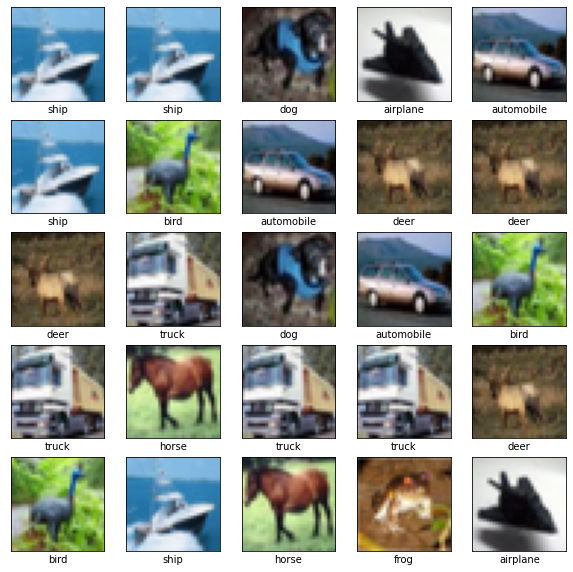

In [116]:
cls_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_imgs_4[i], cmap=plt.cm.binary)
  plt.xlabel(cls_names[train_lbls_4[i]])
plt.show()

In [160]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam(0.01)
num_classes = 10
# number_of_filters, filter_size, convstride, convpadding, activation, max_pool_size, maxpoolstrides, maxpoolpadding.
conv_layers = [[64,3,1,"valid",'relu',1,2,"valid"],[64,3,1,"valid",'relu',2,1,"valid"]]
#number_of_units, activation function.
dense_layers = [[128,'relu'],[64,'relu']]
model_d4 = Genreate_CNN_Arch(conv_layers,dense_layers,num_classes)
#model_d2.summary()

model_d4.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])
model_d4.fit(x=train_imgs_4,y=train_lbls_4,batch_size=128,epochs=10,validation_data=(val_imgs_4,val_lbls_4),shuffle=True)

Epoch 1/10
352/352 [==============================] - 96s 272ms/step - loss: 0.4692 - accuracy: 0.8518 - val_loss: 1.5497e-07 - val_accuracy: 1.0000
Epoch 2/10
352/352 [==============================] - 94s 268ms/step - loss: 1.1724e-07 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 3/10
352/352 [==============================] - 92s 263ms/step - loss: 3.7031e-08 - accuracy: 1.0000 - val_loss: 1.1921e-08 - val_accuracy: 1.0000
Epoch 4/10
352/352 [==============================] - 92s 261ms/step - loss: 1.2428e-08 - accuracy: 1.0000 - val_loss: 1.1921e-08 - val_accuracy: 1.0000
Epoch 5/10
352/352 [==============================] - 91s 259ms/step - loss: 9.2350e-09 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 6/10
352/352 [==============================] - 90s 255ms/step - loss: 1.7219 - accuracy: 0.5242 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
352/352 [==============================] - 90s 257ms/step - loss: 2.3038 - accuracy

In [112]:
test_loss, test_accuracy = model_d4.evaluate(test_imgs_4,test_lbls_4,batch_size=128)
print("test_loss: {} test_acc: {}".format(test_loss,test_accuracy))

79/79 [==============================] - 5s 66ms/step - loss: 27.1103 - accuracy: 0.1445
test_loss: 27.11033058166504 test_acc: 0.1445000022649765
